Scatter Plot

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
df = pd.read_csv('data_jobs.csv')
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,NaN,NaN,NaN,Boehringer Ingelheim,NaN,NaN
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,NaN,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,NaN,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,NaN,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [3]:
df = df[df['job_title_short'] == 'Data Analyst']

In [4]:
df_exp = df.explode('job_skills')
df_skills = df_exp.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    mean_salary = ('salary_year_avg', 'mean')
)
df_skills

,skill_count,mean_salary
job_skills,,
airflow,2002,116819.381944
airtable,88,90006.250000
alteryx,4570,105878.887475
angular,376,102105.500000
angular.js,2,NaN
...,...,...
wrike,39,75000.000000
wsl,16,NaN
xamarin,2,NaN


In [5]:
df_final = df_skills.sort_values('skill_count', ascending=False).head(10)

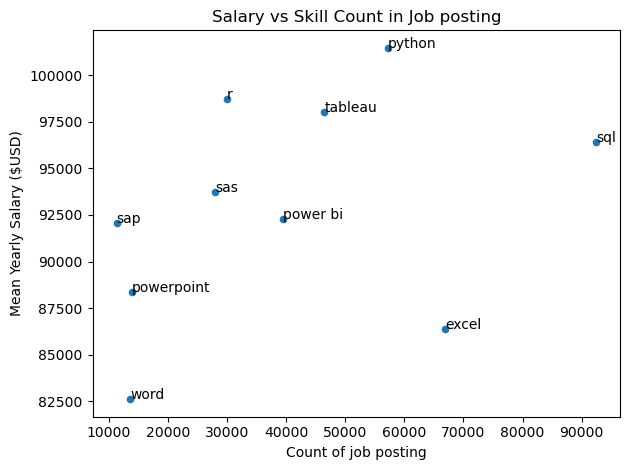

In [6]:
df_final.plot(kind='scatter', x='skill_count', y='mean_salary')
plt.title('Salary vs Skill Count in Job posting')
plt.xlabel('Count of job posting')
plt.ylabel('Mean Yearly Salary ($USD)')
plt.tight_layout()

for i, txt in enumerate(df_final.index):
    plt.text(df_final['skill_count'].iloc[i], df_final['mean_salary'].iloc[i], txt)

plt.show()